In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint as sp_randint
import pickle
% matplotlib inline
# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [45]:
file = open("../../data/features/2019_05_15_features_finally.pickle",'rb')
df = pickle.load(file, encoding='utf-8')
df.columns

Index(['id', 'Datetime', 'text', 'sentiment', 'subjectivity', 'isreply',
       'year', 'month', 'day', 'date', 'DayofWeek', 'Weekend', 'Time',
       'BinaryTrading', 'DayDistance', 'gtrend', 'CommentSentimental',
       'CommentSubjectivity', 'countComment', 'posCommentSum', 'negCommentSum',
       'CommentSD', 'posCommentSD', 'negCommentSD', 'negCommentPercent',
       'posCommentPercent', 'Volume_perc', 'Trading_Hour'],
      dtype='object')

In [46]:
df.shape

(749, 28)

In [47]:
print(df.isnull().sum())

id                      0
Datetime                0
text                    0
sentiment               0
subjectivity            0
isreply                 0
year                    0
month                   0
day                     0
date                    0
DayofWeek               0
Weekend                 0
Time                    0
BinaryTrading           0
DayDistance             0
gtrend                  0
CommentSentimental      0
CommentSubjectivity     0
countComment            0
posCommentSum           0
negCommentSum           0
CommentSD               0
posCommentSD            0
negCommentSD            0
negCommentPercent       0
posCommentPercent       0
Volume_perc            29
Trading_Hour           29
dtype: int64


In [48]:
df = df[df['Volume_perc'].isnull() == False]

In [49]:
df.shape

(720, 28)

In [50]:
df

,id,Datetime,text,sentiment,subjectivity,isreply,year,month,day,date,...,countComment,posCommentSum,negCommentSum,CommentSD,posCommentSD,negCommentSD,negCommentPercent,posCommentPercent,Volume_perc,Trading_Hour
29,1112123741574586368,2019-03-30 22:45:00+00:00,we’ve been so mired in production & logistics ...,-0.025000,0.225000,0,2019,3,30,2019-03-30,...,1635,181.046184,-36.849299,0.244820,0.238605,0.224317,0.092355,0.304587,0.143334,5.0
30,1112106548363292672,2019-03-30 21:37:00+00:00,tesla semi delivering tesla carspic.twitter.co...,0.000000,0.000000,0,2019,3,30,2019-03-30,...,998,115.902111,-21.898603,0.253292,0.242533,0.240379,0.081162,0.301603,0.317909,1.0
31,1112036985504317442,2019-03-30 17:00:00+00:00,"amazing work by tesla delivery teams, especial...",0.182292,0.608333,0,2019,3,30,2019-03-30,...,321,44.390798,-8.188405,0.269115,0.258929,0.184834,0.112150,0.383178,0.065274,6.0
32,1111788218142216192,2019-03-30 00:32:00+00:00,retrofits will start when our software is able...,0.295833,0.419792,1,2019,3,30,2019-03-30,...,490,60.349110,-9.847427,0.229875,0.211034,0.215596,0.106122,0.420408,0.094553,7.0
33,1111762533520531456,2019-03-29 22:50:00+00:00,anyone who purchased full self-driving will ge...,0.155000,0.461667,0,2019,3,29,2019-03-29,...,359,40.492307,-8.223304,0.223112,0.201338,0.215351,0.111421,0.398329,0.326037,1.0
34,1111001632731389952,2019-03-27 20:26:00+00:00,super proud of tesla autopilot team!,0.666667,0.833333,1,2019,3,27,2019-03-27,...,86,17.803204,-1.025000,0.298376,0.279697,0.086796,0.093023,0.500000,0.326037,1.0
35,1110632394611015681,2019-03-26 19:59:00+00:00,i think so. for sure worth giving it our best ...,0.233333,0.359877,1,2019,3,26,2019-03-26,...,842,90.909926,-21.583804,0.221554,0.191146,0.223208,0.119952,0.382423,0.326037,1.0
36,1110576683411628032,2019-03-26 16:18:00+00:00,hard to appreciate how much tesla autopilot im...,-0.045833,0.370833,1,2019,3,26,2019-03-26,...,304,43.359616,-7.845460,0.238042,0.190385,0.201954,0.134868,0.476974,0.326037,1.0
37,1110368897151066114,2019-03-26 02:32:00+00:00,"ford has 4 ceos in 5 years & nobody blinks, bu...",-0.150000,0.050000,1,2019,3,26,2019-03-26,...,2158,206.738652,-50.057119,0.211889,0.203128,0.189100,0.122799,0.330399,0.326037,1.0
38,1109901209446416385,2019-03-24 19:34:00+00:00,every car company is constantly changing price...,0.000000,0.333333,1,2019,3,24,2019-03-24,...,1075,104.795338,-17.476635,0.202355,0.202114,0.140883,0.106047,0.316279,0.326037,1.0


In [51]:
df.columns

Index(['id', 'Datetime', 'text', 'sentiment', 'subjectivity', 'isreply',
       'year', 'month', 'day', 'date', 'DayofWeek', 'Weekend', 'Time',
       'BinaryTrading', 'DayDistance', 'gtrend', 'CommentSentimental',
       'CommentSubjectivity', 'countComment', 'posCommentSum', 'negCommentSum',
       'CommentSD', 'posCommentSD', 'negCommentSD', 'negCommentPercent',
       'posCommentPercent', 'Volume_perc', 'Trading_Hour'],
      dtype='object')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 29 to 748
Data columns (total 28 columns):
id                     720 non-null object
Datetime               720 non-null datetime64[ns, UTC]
text                   720 non-null object
sentiment              720 non-null float64
subjectivity           720 non-null float64
isreply                720 non-null int64
year                   720 non-null int64
month                  720 non-null int64
day                    720 non-null int64
date                   720 non-null object
DayofWeek              720 non-null int64
Weekend                720 non-null bool
Time                   720 non-null object
BinaryTrading          720 non-null int64
DayDistance            720 non-null int64
gtrend                 720 non-null int64
CommentSentimental     720 non-null float64
CommentSubjectivity    720 non-null float64
countComment           720 non-null int64
posCommentSum          720 non-null float64
negCommentSum          720 

In [53]:
df['Weekend'] = df['Weekend'].astype(int)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 29 to 748
Data columns (total 28 columns):
id                     720 non-null object
Datetime               720 non-null datetime64[ns, UTC]
text                   720 non-null object
sentiment              720 non-null float64
subjectivity           720 non-null float64
isreply                720 non-null int64
year                   720 non-null int64
month                  720 non-null int64
day                    720 non-null int64
date                   720 non-null object
DayofWeek              720 non-null int64
Weekend                720 non-null int64
Time                   720 non-null object
BinaryTrading          720 non-null int64
DayDistance            720 non-null int64
gtrend                 720 non-null int64
CommentSentimental     720 non-null float64
CommentSubjectivity    720 non-null float64
countComment           720 non-null int64
posCommentSum          720 non-null float64
negCommentSum          720

In [12]:
# prepare X and Y

X = df[['sentiment', 'subjectivity', 'isreply',
       'year','month','day','DayofWeek', 'Weekend',
       'BinaryTrading', 'DayDistance', 'gtrend', 'CommentSentimental',
       'CommentSubjectivity', 'countComment',  'posCommentSum',
       'negCommentSum', 'CommentSD', 'posCommentSD', 'negCommentSD',
       'negCommentPercent', 'posCommentPercent', 'Trading_Hour']]

Y = df['Volume_perc']

In [13]:
num_features = len(X.columns)

In [14]:
num_features

22

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=100)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(576, 22) (576,)
(144, 22) (144,)


### 1. Linear Regression

In [184]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, Y_train)

print("Linear Reg R^2 training is: {}".format(linear_reg.score(X_train, Y_train)))
print("Linear Reg R^2 testing is: {}".format(linear_reg.score(X_test, Y_test)))
print("Linear Reg Train RMSE is: {}".format(np.sqrt(mean_squared_error(Y_train, linear_reg.predict(X_train)))))
print("Linear Reg Test RMSE is: {}".format(np.sqrt(mean_squared_error(Y_test, linear_reg.predict(X_test)))))

Linear Reg R^2 training is: 0.45511441891137316
Linear Reg R^2 testing is: 0.326126731459214
Linear Reg Train RMSE is: 0.08987651780033974
Linear Reg Test RMSE is: 0.10494770932551606


### 2a. Simple Random Forest

In [186]:
# Random Forest
random_forest = RandomForestRegressor(n_estimators=100)     # instantiate
random_forest.fit(X_train, Y_train)                         # fit

print("Random Forest R^2 training is: {}".format(random_forest.score(X_train, Y_train)))                
print("Random Forest R^2 testing is: {}".format(random_forest.score(X_test, Y_test)))   
print("Random Forest Train RMSE is: {}".format(np.sqrt(mean_squared_error(Y_train, random_forest.predict(X_train)))))
print("Random Forest Test RMSE is: {}".format(np.sqrt(mean_squared_error(Y_test, random_forest.predict(X_test)))))

Random Forest R^2 training is: 0.9352250706722189
Random Forest R^2 testing is: 0.48865259905588065
Random Forest Train RMSE is: 0.030988250195111457
Random Forest Test RMSE is: 0.09142013867106885


### 2b. Random Forest with Cross Validation

In [189]:
rf_cv = RandomForestRegressor(n_estimators=100, max_depth=10, max_features=np.sqrt(num_features), random_state=10)

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]
max_features = [int(x) for x in np.linspace(5, 22, num = 5)]
max_depth = [int(x) for x in np.linspace(10, 30, num = 3)]

# create the hyperparameter grid
hyperparam_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth}

print(hyperparam_grid)

{'n_estimators': [100, 200, 300, 400, 500], 'max_features': [5, 9, 13, 17, 22], 'max_depth': [10, 20, 30]}


In [190]:
rf_grid = GridSearchCV(estimator = rf_cv, 
                       param_grid = hyperparam_grid,
                       cv = 5,
                       verbose=2,
                       n_jobs = -1)

# fit the grid search model
rf_grid.fit(X_train, Y_train)

# best hyperparameters
rf_grid.best_params_

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV] max_depth=10, max_features=5, n_estimators=100 ..................
[CV] ... max_depth=10, max_features=5, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=5, n_estimators=100 ..................


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ... max_depth=10, max_features=5, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=5, n_estimators=100 ..................
[CV] ... max_depth=10, max_features=5, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=5, n_estimators=100 ..................
[CV] ... max_depth=10, max_features=5, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=5, n_estimators=100 ..................
[CV] ... max_depth=10, max_features=5, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=5, n_estimators=200 ..................
[CV] ... max_depth=10, max_features=5, n_estimators=200, total=   0.3s
[CV] max_depth=10, max_features=5, n_estimators=200 ..................
[CV] ... max_depth=10, max_features=5, n_estimators=200, total=   0.3s
[CV] max_depth=10, max_features=5, n_estimators=200 ..................
[CV] ... max_depth=10, max_features=5, n_estimators=200, total=   0.3s
[CV] max_depth=10, max_features=5, n_estimators=200 ..................
[CV] .

[CV] .. max_depth=10, max_features=13, n_estimators=200, total=   0.5s
[CV] max_depth=10, max_features=13, n_estimators=300 .................
[CV] .. max_depth=10, max_features=13, n_estimators=300, total=   0.7s
[CV] max_depth=10, max_features=13, n_estimators=300 .................
[CV] .. max_depth=10, max_features=13, n_estimators=300, total=   0.7s
[CV] max_depth=10, max_features=13, n_estimators=300 .................
[CV] .. max_depth=10, max_features=13, n_estimators=300, total=   0.7s
[CV] max_depth=10, max_features=13, n_estimators=300 .................
[CV] .. max_depth=10, max_features=13, n_estimators=300, total=   0.7s
[CV] max_depth=10, max_features=13, n_estimators=300 .................
[CV] .. max_depth=10, max_features=13, n_estimators=300, total=   0.7s
[CV] max_depth=10, max_features=13, n_estimators=400 .................
[CV] .. max_depth=10, max_features=13, n_estimators=400, total=   1.0s
[CV] max_depth=10, max_features=13, n_estimators=400 .................
[CV] .

[CV] .. max_depth=10, max_features=22, n_estimators=400, total=   1.4s
[CV] max_depth=10, max_features=22, n_estimators=400 .................
[CV] .. max_depth=10, max_features=22, n_estimators=400, total=   1.4s
[CV] max_depth=10, max_features=22, n_estimators=400 .................
[CV] .. max_depth=10, max_features=22, n_estimators=400, total=   1.5s
[CV] max_depth=10, max_features=22, n_estimators=500 .................
[CV] .. max_depth=10, max_features=22, n_estimators=500, total=   1.8s
[CV] max_depth=10, max_features=22, n_estimators=500 .................
[CV] .. max_depth=10, max_features=22, n_estimators=500, total=   1.8s
[CV] max_depth=10, max_features=22, n_estimators=500 .................
[CV] .. max_depth=10, max_features=22, n_estimators=500, total=   1.8s
[CV] max_depth=10, max_features=22, n_estimators=500 .................
[CV] .. max_depth=10, max_features=22, n_estimators=500, total=   1.8s
[CV] max_depth=10, max_features=22, n_estimators=500 .................
[CV] .

[CV] .. max_depth=20, max_features=13, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=13, n_estimators=100 .................
[CV] .. max_depth=20, max_features=13, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=13, n_estimators=100 .................
[CV] .. max_depth=20, max_features=13, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=13, n_estimators=100 .................
[CV] .. max_depth=20, max_features=13, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=13, n_estimators=100 .................
[CV] .. max_depth=20, max_features=13, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=13, n_estimators=200 .................
[CV] .. max_depth=20, max_features=13, n_estimators=200, total=   0.6s
[CV] max_depth=20, max_features=13, n_estimators=200 .................
[CV] .. max_depth=20, max_features=13, n_estimators=200, total=   0.6s
[CV] max_depth=20, max_features=13, n_estimators=200 .................
[CV] .

[CV] .. max_depth=20, max_features=22, n_estimators=200, total=   0.9s
[CV] max_depth=20, max_features=22, n_estimators=200 .................
[CV] .. max_depth=20, max_features=22, n_estimators=200, total=   0.9s
[CV] max_depth=20, max_features=22, n_estimators=300 .................
[CV] .. max_depth=20, max_features=22, n_estimators=300, total=   1.3s
[CV] max_depth=20, max_features=22, n_estimators=300 .................
[CV] .. max_depth=20, max_features=22, n_estimators=300, total=   1.3s
[CV] max_depth=20, max_features=22, n_estimators=300 .................
[CV] .. max_depth=20, max_features=22, n_estimators=300, total=   1.3s
[CV] max_depth=20, max_features=22, n_estimators=300 .................
[CV] .. max_depth=20, max_features=22, n_estimators=300, total=   1.3s
[CV] max_depth=20, max_features=22, n_estimators=300 .................
[CV] .. max_depth=20, max_features=22, n_estimators=300, total=   1.3s
[CV] max_depth=20, max_features=22, n_estimators=400 .................
[CV] .

[CV] ... max_depth=30, max_features=9, n_estimators=400, total=   0.9s
[CV] max_depth=30, max_features=9, n_estimators=400 ..................
[CV] ... max_depth=30, max_features=9, n_estimators=400, total=   0.9s
[CV] max_depth=30, max_features=9, n_estimators=400 ..................
[CV] ... max_depth=30, max_features=9, n_estimators=400, total=   0.9s
[CV] max_depth=30, max_features=9, n_estimators=400 ..................
[CV] ... max_depth=30, max_features=9, n_estimators=400, total=   0.9s
[CV] max_depth=30, max_features=9, n_estimators=500 ..................
[CV] ... max_depth=30, max_features=9, n_estimators=500, total=   1.1s
[CV] max_depth=30, max_features=9, n_estimators=500 ..................
[CV] ... max_depth=30, max_features=9, n_estimators=500, total=   1.1s
[CV] max_depth=30, max_features=9, n_estimators=500 ..................
[CV] ... max_depth=30, max_features=9, n_estimators=500, total=   1.1s
[CV] max_depth=30, max_features=9, n_estimators=500 ..................
[CV] .

[CV] .. max_depth=30, max_features=17, n_estimators=500, total=   1.7s
[CV] max_depth=30, max_features=22, n_estimators=100 .................
[CV] .. max_depth=30, max_features=22, n_estimators=100, total=   0.4s
[CV] max_depth=30, max_features=22, n_estimators=100 .................
[CV] .. max_depth=30, max_features=22, n_estimators=100, total=   0.4s
[CV] max_depth=30, max_features=22, n_estimators=100 .................
[CV] .. max_depth=30, max_features=22, n_estimators=100, total=   0.4s
[CV] max_depth=30, max_features=22, n_estimators=100 .................
[CV] .. max_depth=30, max_features=22, n_estimators=100, total=   0.4s
[CV] max_depth=30, max_features=22, n_estimators=100 .................
[CV] .. max_depth=30, max_features=22, n_estimators=100, total=   0.4s
[CV] max_depth=30, max_features=22, n_estimators=200 .................
[CV] .. max_depth=30, max_features=22, n_estimators=200, total=   0.9s
[CV] max_depth=30, max_features=22, n_estimators=200 .................
[CV] .

[Parallel(n_jobs=-1)]: Done 375 out of 375 | elapsed:  5.3min finished


{'max_depth': 30, 'max_features': 9, 'n_estimators': 200}

In [191]:
#rf_grid.cv_results_

In [16]:
# use optimal hyperparameters
rf_cv = RandomForestRegressor(n_estimators=200, max_depth=30, max_features=15, random_state=10)
rf_cv.fit(X_train, Y_train)                         # fit

print("Random Forest R^2 training is: {}".format(rf_cv.score(X_train, Y_train)))                
print("Random Forest R^2 testing is: {}".format(rf_cv.score(X_test, Y_test)))   
print("Random Forest Train RMSE is: {}".format(np.sqrt(mean_squared_error(Y_train, rf_cv.predict(X_train)))))
print("Random Forest Test RMSE is: {}".format(np.sqrt(mean_squared_error(Y_test, rf_cv.predict(X_test)))))

Random Forest R^2 training is: 0.9365294566703906
Random Forest R^2 testing is: 0.49820875074803495
Random Forest Train RMSE is: 0.0306746550683573
Random Forest Test RMSE is: 0.09056187194740555


### Feature Importance

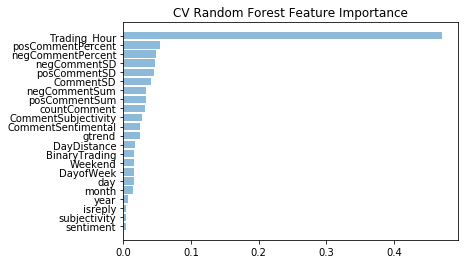

In [17]:
import pandas as pd
feature_importances = pd.DataFrame(rf_cv.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=True)

y_pos = np.arange(len(X_train.columns))
plt.barh(y_pos, feature_importances.importance, align='center', alpha=0.5)
plt.yticks(y_pos, X_train.columns)
plt.title('CV Random Forest Feature Importance')
plt.show()

### 3. Xtreme Gradient Boosting

Parameter Reference: https://www.datacamp.com/community/tutorials/xgboost-in-python

Default Hyperparams:  
 - XGB Train RMSE is: 0.0627184664815691  
 - XGB Test RMSE is: 0.10047705976306533

In [18]:
xgb = XGBRegressor(objective ='reg:linear', 
                   colsample_bytree = 1, 
                   learning_rate = 0.5,
                   max_depth = 20, 
                   alpha = 10, 
                   n_estimators = 200)

xgb.fit(X_train, Y_train)

print("XGB R^2 training is: {}".format(xgb.score(X_train, Y_train)))                
print("XGB R^2 testing is: {}".format(xgb.score(X_test, Y_test)))  
print("XGB Train RMSE is: {}".format(np.sqrt(mean_squared_error(Y_train, xgb.predict(X_train)))))
print("XGB Test RMSE is: {}".format(np.sqrt(mean_squared_error(Y_test, xgb.predict(X_test)))))

XGB R^2 training is: 0.9999836577815081
XGB R^2 testing is: 0.48266799878893124
XGB Train RMSE is: 0.0004922084737485523
XGB Test RMSE is: 0.09195355439622364


# Saving out RF and XGB predictions as df for stacking model.

In [30]:
# get predictions
rf_train_pred = rf_cv.predict(X_train)
rf_test_pred = rf_cv.predict(X_test)
xgb_train_pred = xgb.predict(X_train)
xgb_test_pred = xgb.predict(X_test)


In [31]:
# append results to X
X_train_results = X_train.copy()
X_test_results = X_test.copy()

X_train_results['rf_y'] = rf_train_pred
X_train_results['xgb_y'] = xgb_train_pred
X_test_results['rf_y'] = rf_test_pred
X_test_results['xgb_y'] = xgb_test_pred

In [35]:
# subset only results column with indexing
X_results = X_train_results.append(X_test_results)
X_results = X_results[['rf_y', 'xgb_y']]
X_results.head()

,rf_y,xgb_y
73,0.243262,0.231402
431,0.343272,0.351144
503,0.087852,0.090074
60,0.280677,0.261317
301,0.395392,0.399562


In [43]:
# check df and results have same columns
df.shape, X_results.shape

((720, 28), (720, 2))

In [60]:
# merge orignal df and results with id and Datetime
df_results = pd.merge(df, X_results, left_index=True, right_index=True)
# df_results = df_results[['id', 'Datetime', 'Trading_Hour', 'text', 'rf_y', 'xgb_y']]
df_results.columns

Index(['id', 'Datetime', 'text', 'sentiment', 'subjectivity', 'isreply',
       'year', 'month', 'day', 'date', 'DayofWeek', 'Weekend', 'Time',
       'BinaryTrading', 'DayDistance', 'gtrend', 'CommentSentimental',
       'CommentSubjectivity', 'countComment', 'posCommentSum', 'negCommentSum',
       'CommentSD', 'posCommentSD', 'negCommentSD', 'negCommentPercent',
       'posCommentPercent', 'Volume_perc', 'Trading_Hour', 'rf_y', 'xgb_y'],
      dtype='object')

In [57]:
# pickle out df

pickle.dump(df_results, open("../../data/ml_model_predictions.pk", "wb"))